# Adult Dataset from the UCI Machine Learning Repository
## Building a classifier to determine whether a person makes over 50K a year.(Binary Classification task)

### Attributes:
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 
10th, Doctorate, 5th-6th, Preschool.

- Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Sex: Female, Male.

- Hours-per-week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


## The necessary Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # For beautified visualization

## Reading the data using pandas read_csv()

In [2]:
data=pd.read_csv("adult.csv")
data.head()

,A,Age,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Country,Income
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


### Dropping an unnecessary column!!

In [3]:
data.drop("A",inplace=True,axis=1)

In [4]:
# Surveying the 1st 5 rows of the dataset
data.head()

,Age,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Country,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


### What we can observe from here is that many columns in this dataset are categorical 
This essentially means that we have to convert these columns into usable form by machine learning algorithms.

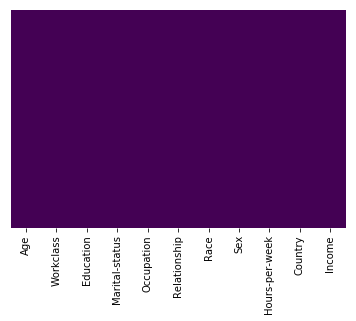

In [5]:
# Checking if the dataset contains any null data using heatmap of seaborn
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## We use pandas built-in function get_dummies() to convert categorical data into useful format

In [6]:
workclass=pd.get_dummies(data['Workclass'],drop_first=True)
education=pd.get_dummies(data['Education'],drop_first=True)
marital_status=pd.get_dummies(data['Marital-status'],drop_first=True)
occupation=pd.get_dummies(data['Occupation'],drop_first=True)
relationship=pd.get_dummies(data['Relationship'],drop_first=True)
race=pd.get_dummies(data['Race'],drop_first=True)
sex=pd.get_dummies(data['Sex'],drop_first=True)
country=pd.get_dummies(data['Country'],drop_first=True)
income=pd.get_dummies(data['Income'],drop_first=True)

# Concatenating Dummy columns we created with the original dataset
data=pd.concat([data,workclass,education,marital_status,occupation,relationship,race,sex,country,income],axis=1)

# Dropping the cloumns we have already included in the data via their dummy columns
data.drop(['Workclass','Education','Marital-status','Occupation','Relationship','Race','Sex','Country','Income'],axis=1,inplace=True)

In [7]:
data.head() # See the difference from the previous data

,Age,Hours-per-week,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,>50K
0,39,40,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X=data.drop(' >50K',axis=1) # X= all the columns except the column to be predicted
y=data[' >50K']# y=column to be predicted

In [9]:
# Splitting the data into training and testing data in a 7:3 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix # importing the Metrics for evaluation

## Here we are gonna explore 4 different machine-learning models because during any real world data one cannot be certain about exactly what model to use and that's why experimentation is a big part of model making 
The Classification models considered here are:
- Logistic Regression
- Support Vector Machine
- Random Forest
- XGBoost

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression #Importing the model from sklearn
logmodel=LogisticRegression()# Instantiating
logmodel.fit(X_train,y_train)# fitting data to the model
pred=logmodel.predict(X_test)# predicting y_test against X_test by the model

#Comparing y_test predicted by the model and actual y_test using Classification report and confusion matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7455
           1       0.69      0.55      0.61      2314

   micro avg       0.83      0.83      0.83      9769
   macro avg       0.78      0.74      0.75      9769
weighted avg       0.83      0.83      0.83      9769

[[6882  573]
 [1048 1266]]


## Support Vector Machine

In [12]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
predict=svc.predict(X_test)

print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7455
           1       0.70      0.50      0.58      2314

   micro avg       0.83      0.83      0.83      9769
   macro avg       0.78      0.72      0.74      9769
weighted avg       0.82      0.83      0.82      9769

[[6956  499]
 [1157 1157]]


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7455
           1       0.63      0.56      0.59      2314

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.75      0.73      0.74      9769
weighted avg       0.81      0.82      0.81      9769

[[6709  746]
 [1025 1289]]


## XGBoost

In [14]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
rfc.fit(X_train, y_train)
prediction = rfc.predict(X_test)

print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7455
           1       0.63      0.55      0.58      2314

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.75      0.72      0.73      9769
weighted avg       0.81      0.82      0.81      9769

[[6705  750]
 [1048 1266]]


## We use 10 fold Cross-Validation on all the models

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
accuracies=cross_val_score(estimator=logmodel,X=X_train,y=y_train,cv=10)
print(accuracies.mean())

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklea

0.8363893057990992


In [17]:
accuracies=cross_val_score(estimator=svc,X=X_train,y=y_train,cv=10)
print(accuracies.mean())

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'aut

0.8289318180019472


In [18]:
accuracies=cross_val_score(estimator=rfc,X=X_train,y=y_train,cv=10,n_jobs=-1)
print(accuracies.mean()) 

0.8181391292660141


In [19]:
accuracies=cross_val_score(estimator=xgb,X=X_train,y=y_train,cv=10,n_jobs=-1)
print(accuracies.mean())

0.8370481439865743


## So here are the stats of the different models we have used:
- Logistic Regression: Accuracy-> 83.64%
- Support Vector Machine: Accuracy-> 82.89%
- Random Forest: Accuracy-> 81.81%
- XGBoost: Accuracy-> 83.70%

## We apply hyperparameter tuning (Using Gridsearch)on only Logistic Regression Model & XGBoost Model as these two have the best accuracy score

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid=[{'C':[1,10,100,1000],'tol':[0.0001,0.00001,0.001,0.01,0.1]}] # Dict of parameters we want to check
grid_search=GridSearchCV(estimator=logmodel,param_grid=param_grid,cv=10,n_jobs=-1,scoring='accuracy')
grid_search=grid_search.fit(X_train,y_train)
print(grid_search.best_score_) # Best Score
print(grid_search.best_params_) # Corresponding Best Parameter Combination

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8363899613899614
{'C': 1, 'tol': 0.0001}


In [22]:
param_grid=[{'learning_rate':[0.5,0.4,0.6,0.7]}] # Dict of parameters we want to check
grid_search=GridSearchCV(estimator=xgb,param_grid=param_grid,cv=10,n_jobs=-1,scoring='accuracy')
grid_search=grid_search.fit(X_train,y_train)
print(grid_search.best_score_) # Best Score
print(grid_search.best_params_) # Corresponding Best Parameter Combination

0.8416549666549666
{'learning_rate': 0.4}


## No improvement at all in Logistic Regression but there is some in case of XGBoost (83.70 -> 84.16).It maybe small but its still an improvement so why not consider it :)

### You may as well try out more Feature Engineering as well as EDA(Exploratory Data Analysis).